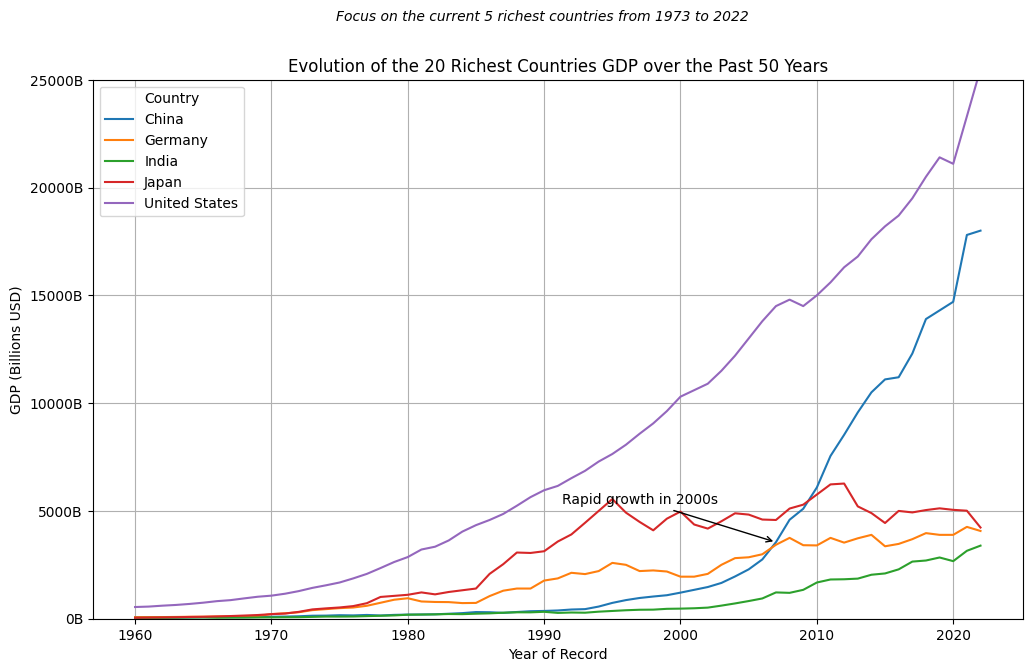

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

gdp_data = pd.read_csv('clean and formated GDP Data For Countries.csv')
selected_countries = ['China', 'Germany', 'India', 'Japan', 'United States']
gdp_data_filtered = gdp_data[gdp_data['Country Name'].isin(selected_countries)]
gdp_data_pivoted = gdp_data_filtered.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP')
gdp_data_pivoted['Year'] = pd.to_datetime(gdp_data_pivoted['Year'].astype(str))

plt.figure(figsize=(12, 7))
palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
sns.lineplot(data=gdp_data_pivoted, x='Year', y='GDP', hue='Country Name', palette=palette)

plt.title('Evolution of the 20 Richest Countries GDP over the Past 50 Years')
plt.suptitle('Focus on the current 5 richest countries from 1973 to 2022', fontsize=10, style='italic')
plt.xlabel('Year of Record')
plt.ylabel('GDP (Billions USD)')

formatter = FuncFormatter(lambda y, _: f'{int(y/1e9)}B')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(0, 25e12)
plt.yticks([0, 5e12, 10e12, 15e12, 20e12, 25e12])
plt.legend(title='Country')

china_data = gdp_data_pivoted[gdp_data_pivoted['Country Name'] == 'China']
china_growth_year = china_data[china_data['Year'] == '2007-01-01']['Year']
china_growth_gdp = china_data[china_data['Year'] == '2007-01-01']['GDP'].values[0]
plt.annotate('Rapid growth in 2000s', xy=(china_growth_year, china_growth_gdp),
             xytext=(china_growth_year - pd.DateOffset(years=10), china_growth_gdp * 1.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')

plt.grid(True)
plt.show()